# Import required library

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set the working directory
# Replace 'your_directory_path' with the folder where your data is stored
os.chdir('C:/Users/Rena/OneDrive - polymtlus/Jupyter Lab Project/Data/Results_DEC2024')

# Import Data

In [3]:
# Load your data from an Excel or CSV file
# Replace 'your_file.csv' with the path to your actual file
driving_data = pd.read_excel('montreal_driving_data.xlsx')  # Use pd.read_csv('your_file.csv') if it's a csv file

In [4]:
driving_data

,person_id,driving
0,1176412,54828.244139
1,3428444,54786.834431
2,34430,54780.191468
3,2318550,54728.603200
4,1144105,54664.112003
...,...,...
79549,1646835,90.950413
79550,538113,88.464061
79551,968119,86.081584
79552,2129179,62.222847


# Lifetime mileage calculation

In [5]:
# Assuming df_run0 has columns 'driving' and 'lifetime_mileage'
# where 'driving' represents the x values

# Define the function to calculate lifetime_mileage
def calculate_lifetime_mileage(x, a, b):
    return -0.0004 * x**2 + 22.935 * x if x < x_max else y_max

# Calculate x_max using the formula x_max = -b/(2*a)
a = -0.0004
b = 22.935
x_max = -b / (2 * a)

# Calculate y_max using the equation at x_max
y_max = -0.0004 * x_max**2 + 22.935 * x_max

# Check x_max and y_max
print("x_max", x_max)
print("y_max", y_max)

# Apply the function to each row in the DataFrame
driving_data['lifetime_mileage'] = driving_data['driving'].apply(lambda x: calculate_lifetime_mileage(x, a, b))

# Display the DataFrame with the lifetime_mileage column
driving_data

x_max 28668.749999999996
y_max 328758.89062499994


,person_id,driving,lifetime_mileage
0,1176412,54828.244139,328758.890625
1,3428444,54786.834431,328758.890625
2,34430,54780.191468,328758.890625
3,2318550,54728.603200,328758.890625
4,1144105,54664.112003,328758.890625
...,...,...,...
79549,1646835,90.950413,2082.638940
79550,538113,88.464061,2025.792880
79551,968119,86.081584,1971.317104
79552,2129179,62.222847,1425.532331


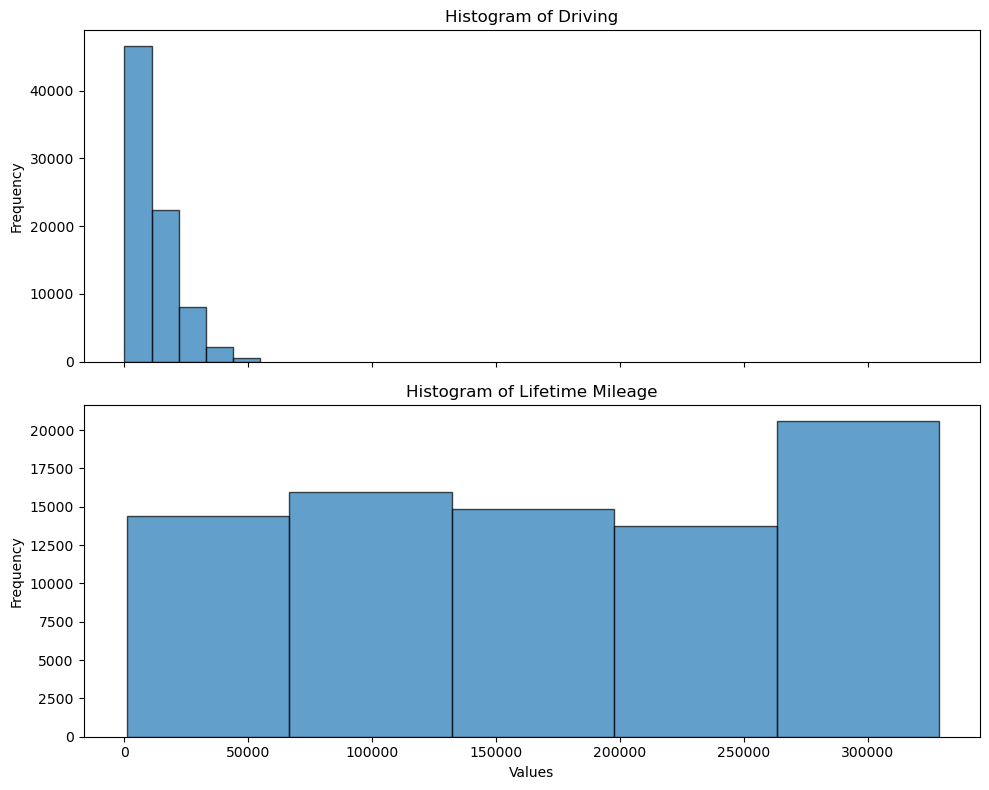

In [6]:
# Plot histograms
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Histogram for "driving"
ax[0].hist(driving_data["driving"], bins=5, edgecolor='black', alpha=0.7)
ax[0].set_title('Histogram of Driving')
ax[0].set_ylabel('Frequency')

# Histogram for "lifetime_mileage"
ax[1].hist(driving_data["lifetime_mileage"], bins=5, edgecolor='black', alpha=0.7)
ax[1].set_title('Histogram of Lifetime Mileage')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Cost calculation and ranking

In [7]:
# Lifetime mileage for carsharing vehicle from the data
ltm_shared = 343883

In [8]:
# Perform cost calculations and ranking

cost = 20000 # It can take any value

driving_data['cost_private'] = cost / driving_data['lifetime_mileage']
driving_data['cost_shared'] = cost / ltm_shared

# Calculate cost_gains as cost_shared / cost_private
driving_data['cost_gains'] = driving_data['cost_shared'] / driving_data['cost_private']

# Add a 'rank' column based on cost_gains (assumes lower is better)
driving_data['rank'] = driving_data['cost_gains'].rank(method='min')

# Save the updated data to a new CSV file
# data.to_csv('updated_data_with_costs_and_rank.csv', index=False)

# Print a preview of the updated data
print(driving_data.head())

   person_id       driving  lifetime_mileage  cost_private  cost_shared  \
0    1176412  54828.244139     328758.890625      0.060835     0.058159   
1    3428444  54786.834431     328758.890625      0.060835     0.058159   
2      34430  54780.191468     328758.890625      0.060835     0.058159   
3    2318550  54728.603200     328758.890625      0.060835     0.058159   
4    1144105  54664.112003     328758.890625      0.060835     0.058159   

   cost_gains     rank  
0     0.95602  74991.0  
1     0.95602  74991.0  
2     0.95602  74991.0  
3     0.95602  74991.0  
4     0.95602  74991.0  


# Carbon footprint calculation

## Import required data

In [9]:
# Load your LCA data
# Replace 'your_emission_file.csv' with your actual file path
lca_data = pd.read_csv('lca_data.csv')


In [10]:
lca_data

# Unit is in kg of impact for veh production and EoL; kg of impact/pkm for other stages

,impact_category,powertrain,year,vehicle_stage,size,value,impact_value,unit
0,GWP100a,BEV,2024,glider,Small,0,8842.585823,kg CO2-Eq.
1,GWP100a,BEV,2024,powertrain,Small,0,2027.253965,kg CO2-Eq.
2,GWP100a,BEV,2024,energy storage,Small,0,5907.628762,kg CO2-Eq.
3,GWP100a,BEV,2024,energy chain,Small,0,0.002281,kg CO2-Eq.
4,GWP100a,BEV,2024,maintenance,Small,0,0.009074,kg CO2-Eq.
...,...,...,...,...,...,...,...,...
409,non-renewable primary energy,ICEV-p,2024,maintenance,Small,0,0.146095,megajoule
410,non-renewable primary energy,ICEV-p,2024,EoL,Small,0,935.601769,megajoule
411,non-renewable primary energy,ICEV-p,2024,road,Small,0,0.408980,megajoule
412,non-renewable primary energy,ICEV-p,2024,direct - non-exhaust,Small,0,0.000000,megajoule


## Calculate and plot carbon footprint for average user

In [11]:
pc_data = lca_data.copy()
shared_data = lca_data.copy()

In [12]:
# Determine the median value of lifetime mileage for private car
ltm_pc = np.median(driving_data['lifetime_mileage'])
ltm_pc = round(ltm_pc, 0)
ltm_pc

172481.0

In [13]:
print(pc_data[pc_data['vehicle_stage'].isin(['glider', 'powertrain', 'energy storage', 'EoL'])][['vehicle_stage', 'impact_value']])

      vehicle_stage  impact_value
0            glider   8842.585823
1        powertrain   2027.253965
2    energy storage   5907.628762
5               EoL   1094.583781
9            glider   7485.988741
..              ...           ...
401             EoL   5345.726518
405          glider  97470.784871
406      powertrain  22139.103968
407  energy storage   2967.516091
410             EoL    935.601769

[184 rows x 2 columns]


In [14]:
# Perform the operation for PC
pc_data.loc[pc_data['vehicle_stage'].isin(['glider', 'powertrain', 'energy storage', 'EoL']), 'impact_value'] = (
    pc_data['impact_value'] / ltm_pc
)


In [15]:
# Perform the operation for carsharing
shared_data.loc[shared_data['vehicle_stage'].isin(['glider', 'powertrain', 'energy storage', 'EoL']), 'impact_value'] = (
    shared_data['impact_value'] / ltm_shared
)

In [16]:
# Add a column to indicate the scenario
pc_data['scenario'] = 'PC'
shared_data['scenario'] = 'Shared'

# Combine both DataFrames
combined_data = pd.concat([pc_data, shared_data])

In [17]:
combined_data

,impact_category,powertrain,year,vehicle_stage,size,value,impact_value,unit,scenario
0,GWP100a,BEV,2024,glider,Small,0,0.051267,kg CO2-Eq.,PC
1,GWP100a,BEV,2024,powertrain,Small,0,0.011753,kg CO2-Eq.,PC
2,GWP100a,BEV,2024,energy storage,Small,0,0.034251,kg CO2-Eq.,PC
3,GWP100a,BEV,2024,energy chain,Small,0,0.002281,kg CO2-Eq.,PC
4,GWP100a,BEV,2024,maintenance,Small,0,0.009074,kg CO2-Eq.,PC
...,...,...,...,...,...,...,...,...,...
409,non-renewable primary energy,ICEV-p,2024,maintenance,Small,0,0.146095,megajoule,Shared
410,non-renewable primary energy,ICEV-p,2024,EoL,Small,0,0.002721,megajoule,Shared
411,non-renewable primary energy,ICEV-p,2024,road,Small,0,0.408980,megajoule,Shared
412,non-renewable primary energy,ICEV-p,2024,direct - non-exhaust,Small,0,0.000000,megajoule,Shared


In [18]:
# List unique values in the 'impact_category' column
unique_impact_categories = combined_data['impact_category'].unique()

# Print the unique values
print(unique_impact_categories)

['GWP100a' 'freshwater ecotoxicity' 'human toxicity' 'marine ecotoxicity'
 'terrestrial ecotoxicity' 'metal depletion'
 'agricultural land occupation' 'climate change' 'fossil depletion'
 'freshwater eutrophication' 'ionising radiation' 'marine eutrophication'
 'natural land transformation' 'ozone depletion'
 'particulate matter formation' 'photochemical oxidant formation'
 'terrestrial acidification' 'urban land occupation' 'water depletion'
 'GWP100a, incl. bio CO2' 'noise emissions' 'renewable primary energy'
 'non-renewable primary energy']


,powertrain,scenario,impact_value
0,BEV,PC,0.111094
1,BEV,Shared,0.061282
2,ICEV-p,PC,0.230881
3,ICEV-p,Shared,0.202545


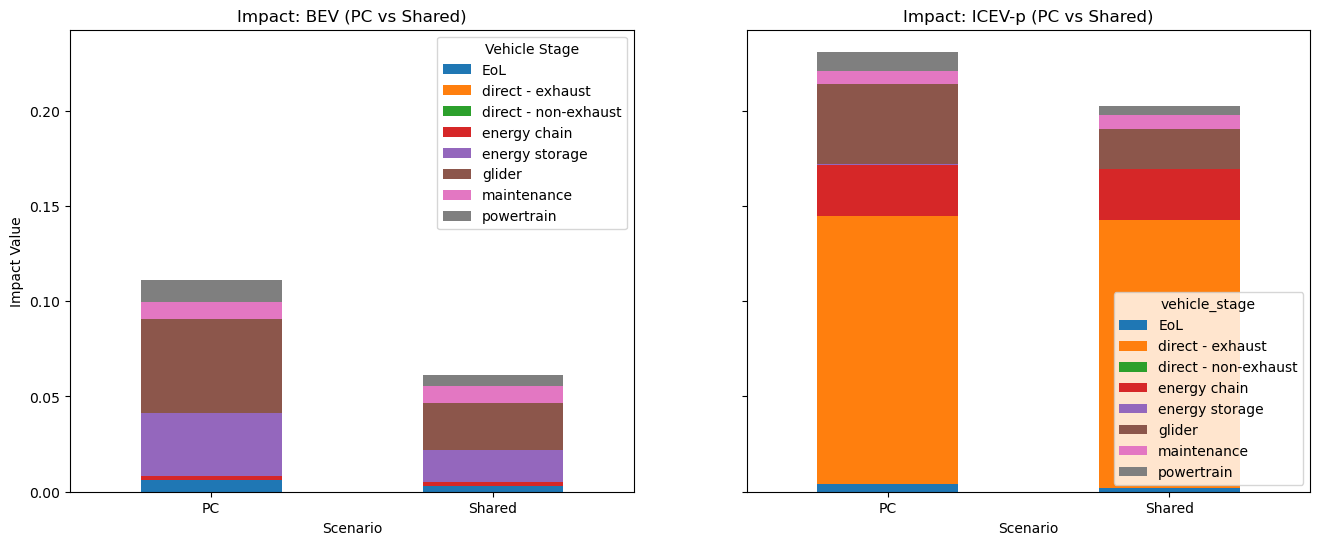

In [19]:
# Step 1: Filter for Climate Change Impact Category
impact_cat_data = combined_data[combined_data['impact_category'] == 'climate change']

# Step 2: Remove 'road' from vehicle_stage
impact_cat_data = impact_cat_data[impact_cat_data['vehicle_stage'] != 'road']

# Calculate the total impact value for each powertrain and scenario
total_output = impact_cat_data.groupby(['powertrain', 'scenario'])['impact_value'].sum().reset_index()

display(total_output)

# Step 3: Separate Data for BEV and ICEV-p
bev_data = impact_cat_data[impact_cat_data['powertrain'] == 'BEV']
icev_p_data = impact_cat_data[impact_cat_data['powertrain'] == 'ICEV-p']

# Step 4: Group and Aggregate Data for Each Powertrain
bev_plot_data = bev_data.groupby(['scenario', 'vehicle_stage'])['impact_value'].sum().unstack()
icev_p_plot_data = icev_p_data.groupby(['scenario', 'vehicle_stage'])['impact_value'].sum().unstack()

# Step 5: Create Side-by-Side Subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for BEV
bev_plot_data.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    title="Impact: BEV (PC vs Shared)"
)
axes[0].set_xlabel('Scenario')
axes[0].set_ylabel('Impact Value')
axes[0].legend(title='Vehicle Stage', loc='upper right')
axes[0].tick_params(axis='x', rotation=0)

# Plot for ICEV-p
icev_p_plot_data.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],
    title="Impact: ICEV-p (PC vs Shared)"
)
axes[1].set_xlabel('Scenario')
# axes[1].legend(title='Vehicle Stage', loc='upper right')
axes[1].tick_params(axis='x', rotation=0)

# Adjust Layout
# plt.tight_layout()

# Save the Combined Plot
plt.savefig('climate_change_BEV_vs_ICEV-p_stacked_bar_chart.png')

# Show the Plot
plt.show()


We can also look at the other impact categories.

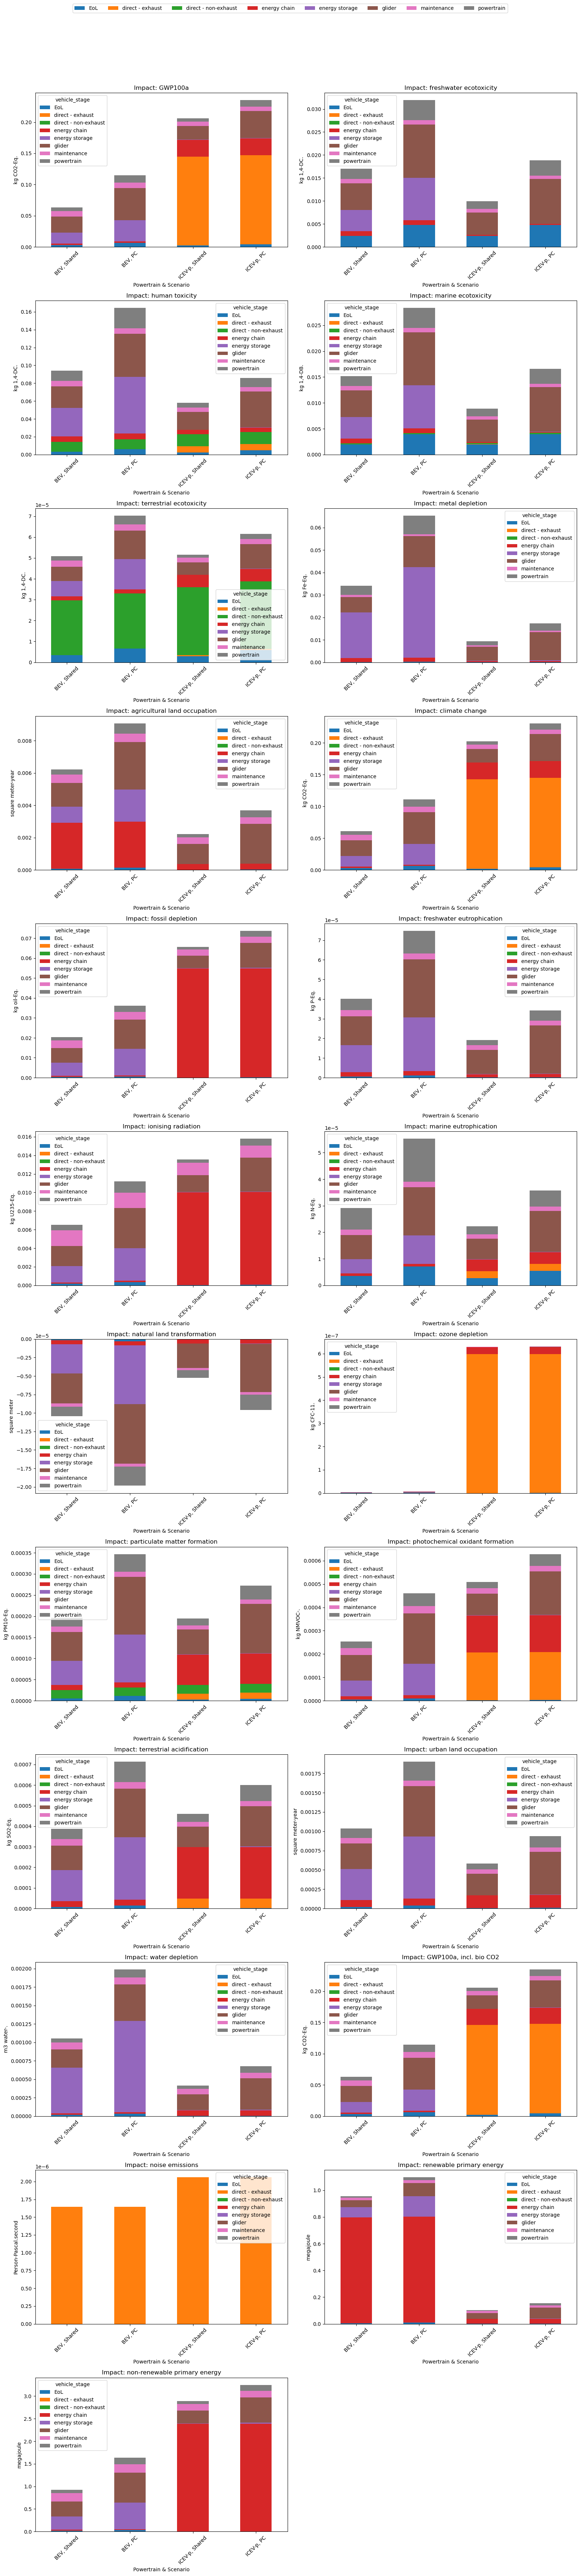

In [20]:
# Step 1: Get All Unique Impact Categories
impact_categories = combined_data['impact_category'].unique()

# Step 2: Determine Grid Size for Subplots
num_categories = len(impact_categories)
rows = (num_categories + 1) // 2  # 2 plots per row

# Step 3: Create Subplots
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 6), sharey=False)
axes = axes.flatten()  # Flatten axes for easier indexing

# Step 4: Loop Through Each Impact Category and Plot
for i, category in enumerate(impact_categories):
    # Filter data for the current impact category
    impact_cat_data = combined_data[combined_data['impact_category'] == category]
    
    # Remove 'road' from vehicle_stage
    impact_cat_data = impact_cat_data[impact_cat_data['vehicle_stage'] != 'road']

    # Get the unit for the current impact category
    unit = impact_cat_data['unit'].iloc[0] if not impact_cat_data['unit'].isnull().all() else "Unknown Unit"
    
    # Group data by powertrain, scenario, and vehicle_stage
    grouped_data = (
        impact_cat_data
        .groupby(['powertrain', 'scenario', 'vehicle_stage'])['impact_value']
        .sum()
        .reset_index()
    )
    
    # Pivot the data to create bars for powertrain + scenario and stacks for vehicle_stage
    pivot_data = grouped_data.pivot_table(
        index='vehicle_stage', 
        columns=['powertrain', 'scenario'], 
        values='impact_value', 
        fill_value=0
    )
    
    # Reorganize columns for consistent bar order
    pivot_data = pivot_data[
        [('BEV', 'Shared'), ('BEV', 'PC'), ('ICEV-p', 'Shared'), ('ICEV-p', 'PC')]
    ]
    pivot_data.columns = ['BEV, Shared', 'BEV, PC', 'ICEV-p, Shared', 'ICEV-p, PC']
    
    # Transpose for bars as powertrain + scenario, stacks as vehicle_stage
    plot_data = pivot_data.T
    
    # Plot in the grid
    plot_data.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        title=f"Impact: {category}"
    )
    axes[i].set_xlabel('Powertrain & Scenario')
    axes[i].set_ylabel(unit)
    axes[i].tick_params(axis='x', rotation=45)

# Step 5: Remove Unused Subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 6: Add Unified Legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 0.98))

# Adjust Layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show All Plots
plt.show()


## Analysis of burden shifting by normalizing all other impact categories to climate change

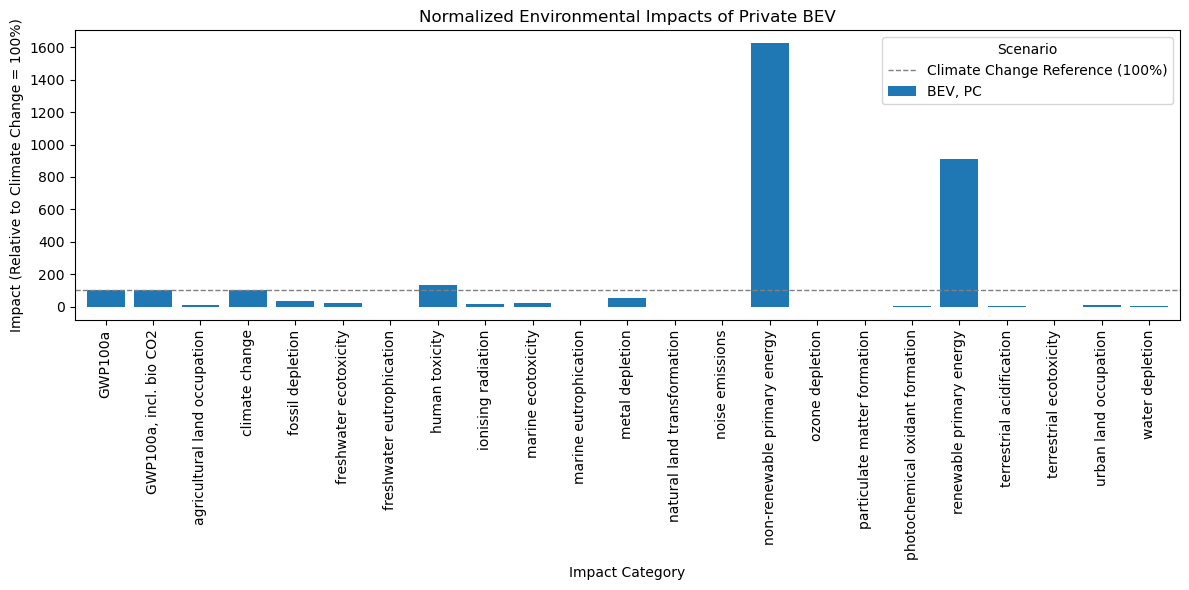

In [ ]:
# Step 1: Filter for BEV, PC and BEV, Shared
bev_pc_data = combined_data[(combined_data['powertrain'] == 'BEV') & (combined_data['scenario'] == 'PC')]


# Step 2: Sum Total Impact Values by Impact Category
bev_pc_totals = bev_pc_data.groupby('impact_category')['impact_value'].sum()


# Step 3: Normalize All Categories Relative to Climate Change
bev_pc_normalized = (bev_pc_totals / bev_pc_totals['climate change']) * 100


# Combine for Plotting
normalized_data = pd.DataFrame({
    'Impact Category': bev_pc_totals.index,
    'BEV, PC': bev_pc_normalized.values,
}).set_index('Impact Category')

# Step 4: Plot the Results
fig, ax = plt.subplots(figsize=(12, 6))
normalized_data.plot(
    kind='bar',
    ax=ax,
    width=0.8
)

# Customize the Plot
ax.set_title('Normalized Environmental Impacts of private BEV')
ax.set_ylabel('Impact (Relative to Climate Change = 100%)')
ax.set_xlabel('Impact Category')
ax.tick_params(axis='x', rotation=90)
ax.axhline(100, color='gray', linestyle='--', linewidth=1, label='Climate Change Reference (100%)')
ax.legend(title='Scenario')
plt.tight_layout()

# Show Plot
plt.show()


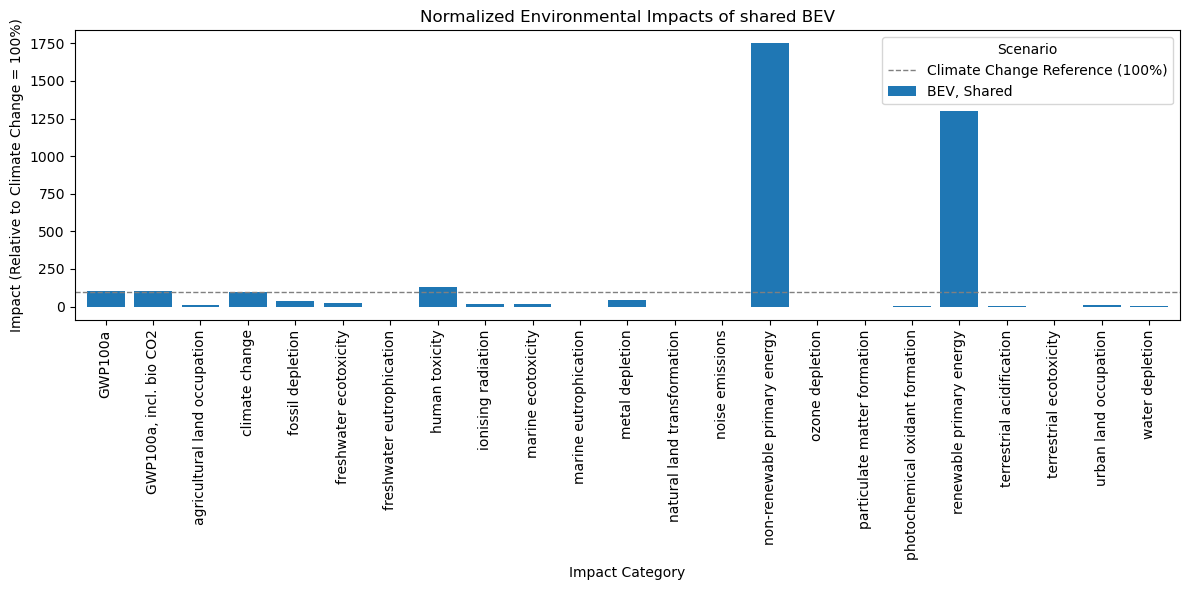

In [31]:
bev_shared_data = combined_data[(combined_data['powertrain'] == 'BEV') & (combined_data['scenario'] == 'Shared')]
bev_shared_totals = bev_shared_data.groupby('impact_category')['impact_value'].sum()
bev_shared_normalized = (bev_shared_totals / bev_shared_totals['climate change']) * 100
# Combine for Plotting
normalized_data = pd.DataFrame({
    'Impact Category': bev_shared_totals.index,
    'BEV, Shared': bev_shared_normalized.values
}).set_index('Impact Category')

# Step 4: Plot the Results
fig, ax = plt.subplots(figsize=(12, 6))
normalized_data.plot(
    kind='bar',
    ax=ax,
    width=0.8
)

# Customize the Plot
ax.set_title('Normalized Environmental Impacts of shared BEV')
ax.set_ylabel('Impact (Relative to Climate Change = 100%)')
ax.set_xlabel('Impact Category')
ax.tick_params(axis='x', rotation=90)
ax.axhline(100, color='gray', linestyle='--', linewidth=1, label='Climate Change Reference (100%)')
ax.legend(title='Scenario')
plt.tight_layout()

# Show Plot
plt.show()

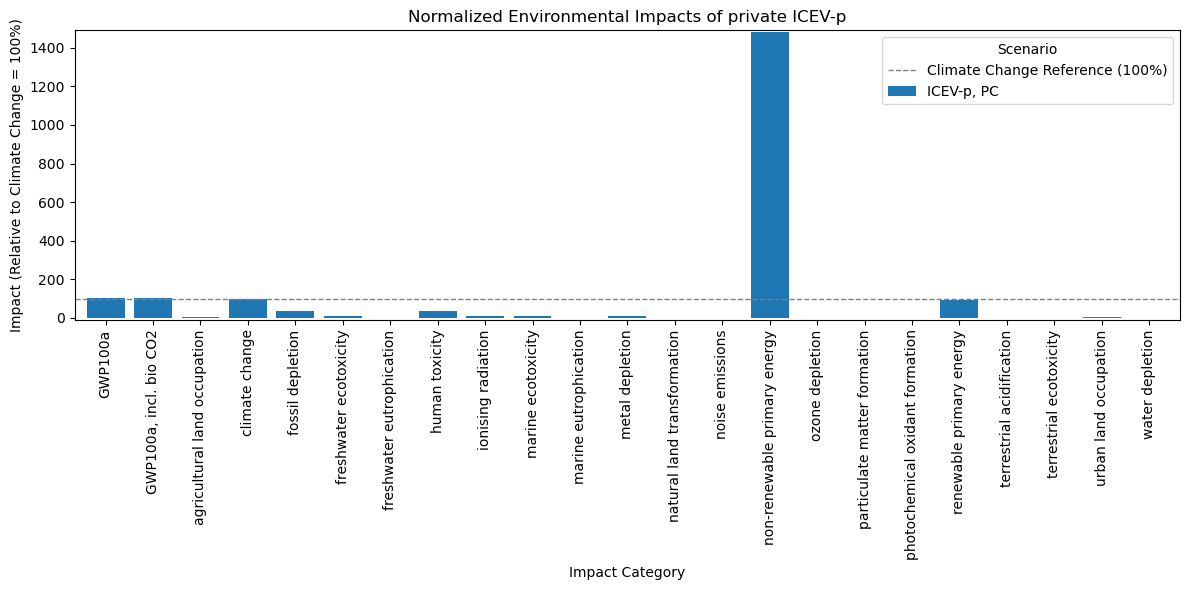

In [28]:

# Step 1: Filter for ICEV-p, PC and ICEV-p, Shared
icev_pc_data = combined_data[(combined_data['powertrain'] == 'ICEV-p') & (combined_data['scenario'] == 'PC')]

# Step 2: Sum Total Impact Values by Impact Category
icev_pc_totals = icev_pc_data.groupby('impact_category')['impact_value'].sum()

# Step 3: Normalize All Categories Relative to Climate Change
icev_pc_normalized = (icev_pc_totals / icev_pc_totals['climate change']) * 100

# Combine for Plotting
normalized_data = pd.DataFrame({
    'Impact Category': icev_pc_totals.index,
    'ICEV-p, PC': icev_pc_normalized.values
}).set_index('Impact Category')

# Step 4: Plot the Results
fig, ax = plt.subplots(figsize=(12, 6))
normalized_data.plot(
    kind='bar',
    ax=ax,
    width=0.8,
    color=['#1f77b4', '#ff7f0e']  # Different colors for scenarios
)

# Customize the Plot
ax.set_title('Normalized Environmental Impacts of private ICEV-p')
ax.set_ylabel('Impact (Relative to Climate Change = 100%)')
ax.set_xlabel('Impact Category')
ax.tick_params(axis='x', rotation=90)

# Add gridlines and reference line for Climate Change
ax.axhline(100, color='gray', linestyle='--', linewidth=1, label='Climate Change Reference (100%)')

# Adjust y-axis limits if necessary
min_val = normalized_data.min().min()  # Get the smallest value
max_val = normalized_data.max().max()  # Get the largest value
ax.set_ylim(min_val - 10, max_val + 10)  # Add some padding for better visualization

# Add legend
ax.legend(title='Scenario')
plt.tight_layout()

# Show Plot
plt.show()


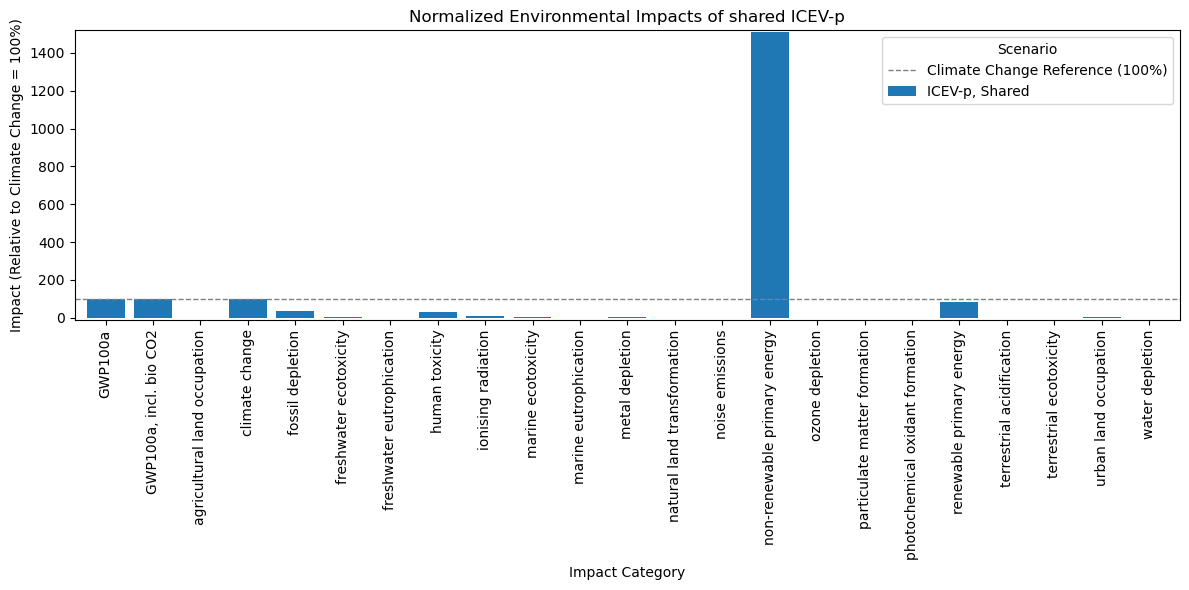

In [29]:

# Step 1: Filter for ICEV-p, PC and ICEV-p, Shared
icev_shared_data = combined_data[(combined_data['powertrain'] == 'ICEV-p') & (combined_data['scenario'] == 'Shared')]

# Step 2: Sum Total Impact Values by Impact Category
icev_shared_totals = icev_shared_data.groupby('impact_category')['impact_value'].sum()

# Step 3: Normalize All Categories Relative to Climate Change
icev_shared_normalized = (icev_shared_totals / icev_shared_totals['climate change']) * 100

# Combine for Plotting
normalized_data = pd.DataFrame({
    'Impact Category': icev_shared_totals.index,
    'ICEV-p, Shared': icev_shared_normalized.values
}).set_index('Impact Category')

# Step 4: Plot the Results
fig, ax = plt.subplots(figsize=(12, 6))
normalized_data.plot(
    kind='bar',
    ax=ax,
    width=0.8,
    color=['#1f77b4', '#ff7f0e']  # Different colors for scenarios
)

# Customize the Plot
ax.set_title('Normalized Environmental Impacts of shared ICEV-p')
ax.set_ylabel('Impact (Relative to Climate Change = 100%)')
ax.set_xlabel('Impact Category')
ax.tick_params(axis='x', rotation=90)

# Add gridlines and reference line for Climate Change
ax.axhline(100, color='gray', linestyle='--', linewidth=1, label='Climate Change Reference (100%)')

# Adjust y-axis limits if necessary
min_val = normalized_data.min().min()  # Get the smallest value
max_val = normalized_data.max().max()  # Get the largest value
ax.set_ylim(min_val - 10, max_val + 10)  # Add some padding for better visualization

# Add legend
ax.legend(title='Scenario')
plt.tight_layout()

# Show Plot
plt.show()

# Analysis of burden shifting between shared BEV and shared ICEV-p

## Calculate and plot the carbon footprint for different user profiles

In [113]:
# Initialize an empty DataFrame for results
results = []

# Separate data into BEV and ICEV-p
for powertrain in ['BEV', 'ICEV-p']:
    subset = lca_data[lca_data['powertrain'] == powertrain]
    
    # Loop through each impact category
    for impact_category in subset['impact_category'].unique():
        impact_data = subset[subset['impact_category'] == impact_category]
        
        # Calculate each emission category
        veh_production = impact_data.loc[impact_data['stage'].isin(['glider', 'powertrain', 'energy storage']), 'impact'].sum()
        veh_operation = impact_data.loc[impact_data['stage'].isin(['maintenance', 'direct - non-exhaust', 'direct - exhaust']), 'impact'].sum()
        veh_eol = impact_data.loc[impact_data['stage'] == 'EoL', 'impact'].sum()
        energy_supply = impact_data.loc[impact_data['stage'] == 'energy chain', 'impact'].sum()
        
        # Append results
        results.append({
            'powertrain': powertrain,
            'impact_category': impact_category,
            'veh_production': veh_production,
            'veh_operation': veh_operation,
            'veh_eol': veh_eol,
            'energy_supply': energy_supply
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
# results_df.to_csv('emission_summary_by_category.csv', index=False)

# Print a preview of the results
results_df


,powertrain,impact_category,veh_production,veh_operation,veh_eol,energy_supply
0,BEV,climate change,16159.173995,0.008940,1078.003969,0.002284
1,BEV,particulate matter formation,50.195092,0.000032,1.993767,0.000013
2,BEV,photochemical oxidant formation,69.940414,0.000031,1.636950,0.000015
3,BEV,terrestrial acidification,110.505480,0.000031,2.501732,0.000028
4,ICEV-p,climate change,9074.478205,0.147577,731.290621,0.026453
5,ICEV-p,particulate matter formation,25.905618,0.000045,0.844319,0.000072
6,ICEV-p,photochemical oxidant formation,40.979594,0.000229,0.557769,0.000158
7,ICEV-p,terrestrial acidification,47.750364,0.000070,0.440279,0.000250


In [114]:
# Filter LCA data for BEV and ICEV-p and for the climate change impact category
filtered_lca_data = lca_data[
    (lca_data['powertrain'].isin(['BEV', 'ICEV-p'])) &
    (lca_data['impact_category'] == 'climate change')
].copy()

# Initialize columns for veh_production, veh_eol, veh_operation, and energy_supply
filtered_lca_data['veh_production'] = filtered_lca_data['impact'].where(
    filtered_lca_data['stage'].isin(['glider', 'powertrain', 'energy storage']), 0)

filtered_lca_data['veh_eol'] = filtered_lca_data['impact'].where(
    filtered_lca_data['stage'] == 'EoL', 0)

filtered_lca_data['veh_operation'] = filtered_lca_data['impact'].where(
    filtered_lca_data['stage'].isin(['maintenance', 'direct - non-exhaust', 'direct - exhaust']), 0)

filtered_lca_data['energy_supply'] = filtered_lca_data['impact'].where(
    filtered_lca_data['stage'] == 'energy chain', 0)

# Aggregate LCA data by powertrain
aggregated_lca_data = filtered_lca_data.groupby('powertrain')[
    ['veh_production', 'veh_eol', 'veh_operation', 'energy_supply']
].sum().reset_index()

# Duplicate driving data and assign powertrain labels
driving_data_bev = driving_data.copy()
driving_data_bev['powertrain'] = 'BEV'

driving_data_icevp = driving_data.copy()
driving_data_icevp['powertrain'] = 'ICEV-p'

# Merge with aggregated LCA data
bev_data = driving_data_bev.merge(aggregated_lca_data[aggregated_lca_data['powertrain'] == 'BEV'], on='powertrain', how='left')
icevp_data = driving_data_icevp.merge(aggregated_lca_data[aggregated_lca_data['powertrain'] == 'ICEV-p'], on='powertrain', how='left')

# Calculate carbon footprint per passenger-kilometer (pkm) for BEV
bev_data['veh_production_pc'] = bev_data['veh_production'] / bev_data['lifetime_mileage']
bev_data['veh_eol_pc'] = bev_data['veh_eol'] / bev_data['lifetime_mileage']
bev_data['veh_operation'] = bev_data['veh_operation'] 
bev_data['energy_supply'] = bev_data['energy_supply'] 

# Calculate carbon footprint per passenger-kilometer (pkm) for ICEV-p
icevp_data['veh_production_pc'] = icevp_data['veh_production'] / icevp_data['lifetime_mileage']
icevp_data['veh_eol_pc'] = icevp_data['veh_eol'] / icevp_data['lifetime_mileage']
icevp_data['veh_operation'] = icevp_data['veh_operation'] 
icevp_data['energy_supply'] = icevp_data['energy_supply'] 

# Add veh_production_cs and veh_eol_cs columns for BEV
bev_data['veh_production_cs'] = bev_data['veh_production'] / ltm_shared
bev_data['veh_eol_cs'] = bev_data['veh_eol'] / ltm_shared

# Add veh_production_cs and veh_eol_cs columns for ICEV-p
icevp_data['veh_production_cs'] = icevp_data['veh_production'] / ltm_shared
icevp_data['veh_eol_cs'] = icevp_data['veh_eol'] / ltm_shared

# Combine results back into one DataFrame
# updated_driving_data = pd.concat([bev_data, icevp_data])

# Save the updated driving data to a new file
# updated_driving_data.to_csv('updated_driving_data_with_carbon_footprint.csv', index=False)
bev_data.to_csv('bev_data.csv', index=False)
icevp_data.to_csv('icevp_data.csv', index=False)

# Print a preview of the updated driving data
# updated_driving_data


In [115]:
bev_data


,person_id,driving,predicted_lifespan,cost_private,cost_shared,cost_gains,rank,powertrain,veh_production,veh_eol,veh_operation,energy_supply,veh_production_pc,veh_eol_pc,veh_production_cs,veh_eol_cs
0,1176412,54828.244139,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135
1,3428444,54786.834431,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135
2,34430,54780.191468,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135
3,2318550,54728.603200,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135
4,1144105,54664.112003,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79549,1646835,90.950413,2082.638940,9.603201,0.058159,0.006056,5.0,BEV,16159.173995,1078.003969,0.00894,0.002284,7.758990,0.517614,0.04699,0.003135
79550,538113,88.464061,2025.792880,9.872678,0.058159,0.005891,4.0,BEV,16159.173995,1078.003969,0.00894,0.002284,7.976716,0.532139,0.04699,0.003135
79551,968119,86.081584,1971.317104,10.145501,0.058159,0.005733,3.0,BEV,16159.173995,1078.003969,0.00894,0.002284,8.197146,0.546845,0.04699,0.003135
79552,2129179,62.222847,1425.532331,14.029847,0.058159,0.004145,2.0,BEV,16159.173995,1078.003969,0.00894,0.002284,11.335537,0.756212,0.04699,0.003135


In [116]:
icevp_data

,person_id,driving,predicted_lifespan,cost_private,cost_shared,cost_gains,rank,powertrain,veh_production,veh_eol,veh_operation,energy_supply,veh_production_pc,veh_eol_pc,veh_production_cs,veh_eol_cs
0,1176412,54828.244139,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,0.027602,0.002224,0.026388,0.002127
1,3428444,54786.834431,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,0.027602,0.002224,0.026388,0.002127
2,34430,54780.191468,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,0.027602,0.002224,0.026388,0.002127
3,2318550,54728.603200,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,0.027602,0.002224,0.026388,0.002127
4,1144105,54664.112003,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,0.027602,0.002224,0.026388,0.002127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79549,1646835,90.950413,2082.638940,9.603201,0.058159,0.006056,5.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,4.357202,0.351137,0.026388,0.002127
79550,538113,88.464061,2025.792880,9.872678,0.058159,0.005891,4.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,4.479470,0.360990,0.026388,0.002127
79551,968119,86.081584,1971.317104,10.145501,0.058159,0.005733,3.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,4.603256,0.370965,0.026388,0.002127
79552,2129179,62.222847,1425.532331,14.029847,0.058159,0.004145,2.0,ICEV-p,9074.478205,731.290621,0.147577,0.026453,6.365677,0.512995,0.026388,0.002127


# Adoption analysis for different user profiles

In [150]:
user_bev = bev_data.copy()
user_icevp = icevp_data.copy()

In [151]:
# Calculate indi_cf_pc as the sum of specified columns
user_bev['indi_cf_pc'] = (
    user_bev['veh_production_pc'] +
    user_bev['veh_eol_pc'] +
    user_bev['veh_operation'] +
    user_bev['energy_supply']
)

# Calculate indi_cf_cs as the sum of specified columns
user_bev['indi_cf_cs'] = (
    user_bev['veh_production_cs'] +
    user_bev['veh_eol_cs'] +
    user_bev['veh_operation'] +
    user_bev['energy_supply']
)

# Calculate indi_cf_pc as the sum of specified columns
user_icevp['indi_cf_pc'] = (
    user_icevp['veh_production_pc'] +
    user_icevp['veh_eol_pc'] +
    user_icevp['veh_operation'] +
    user_icevp['energy_supply']
)

# Calculate indi_cf_cs as the sum of specified columns
user_icevp['indi_cf_cs'] = (
    user_icevp['veh_production_cs'] +
    user_icevp['veh_eol_cs'] +
    user_icevp['veh_operation'] +
    user_icevp['energy_supply']
)

In [152]:
display(user_bev)

,person_id,driving,predicted_lifespan,cost_private,cost_shared,cost_gains,rank,powertrain,veh_production,veh_eol,veh_operation,energy_supply,veh_production_pc,veh_eol_pc,veh_production_cs,veh_eol_cs,indi_cf_pc,indi_cf_cs
0,1176412,54828.244139,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135,0.063655,0.061349
1,3428444,54786.834431,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135,0.063655,0.061349
2,34430,54780.191468,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135,0.063655,0.061349
3,2318550,54728.603200,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135,0.063655,0.061349
4,1144105,54664.112003,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,0.00894,0.002284,0.049152,0.003279,0.04699,0.003135,0.063655,0.061349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79549,1646835,90.950413,2082.638940,9.603201,0.058159,0.006056,5.0,BEV,16159.173995,1078.003969,0.00894,0.002284,7.758990,0.517614,0.04699,0.003135,8.287828,0.061349
79550,538113,88.464061,2025.792880,9.872678,0.058159,0.005891,4.0,BEV,16159.173995,1078.003969,0.00894,0.002284,7.976716,0.532139,0.04699,0.003135,8.520079,0.061349
79551,968119,86.081584,1971.317104,10.145501,0.058159,0.005733,3.0,BEV,16159.173995,1078.003969,0.00894,0.002284,8.197146,0.546845,0.04699,0.003135,8.755215,0.061349
79552,2129179,62.222847,1425.532331,14.029847,0.058159,0.004145,2.0,BEV,16159.173995,1078.003969,0.00894,0.002284,11.335537,0.756212,0.04699,0.003135,12.102972,0.061349


In [153]:
unit = 'gram CO2-eq/km'

Processing User BEV:
Group 1: Min = 658.36, Max = 15530.52, Median = 959.82, Driving Range = 48 km - 1186 km
Group 2: Min = 420.77, Max = 658.21, Median = 512.41, Driving Range = 1186 km - 1898 km
Group 3: Min = 311.74, Max = 420.71, Median = 357.62, Driving Range = 1898 km - 2621 km
Group 4: Min = 247.87, Max = 311.74, Median = 277.43, Driving Range = 2621 km - 3374 km
Group 5: Min = 205.35, Max = 247.86, Median = 224.47, Driving Range = 3375 km - 4176 km
Group 6: Min = 175.48, Max = 205.35, Median = 189.17, Driving Range = 4176 km - 5014 km
Group 7: Min = 153.08, Max = 175.48, Median = 163.30, Driving Range = 5014 km - 5907 km
Group 8: Min = 135.90, Max = 153.07, Median = 143.89, Driving Range = 5907 km - 6845 km
Group 9: Min = 122.28, Max = 135.89, Median = 128.67, Driving Range = 6846 km - 7840 km
Group 10: Min = 111.16, Max = 122.27, Median = 116.46, Driving Range = 7840 km - 8903 km
Group 11: Min = 101.48, Max = 111.16, Median = 106.16, Driving Range = 8903 km - 10110 km
Group 12

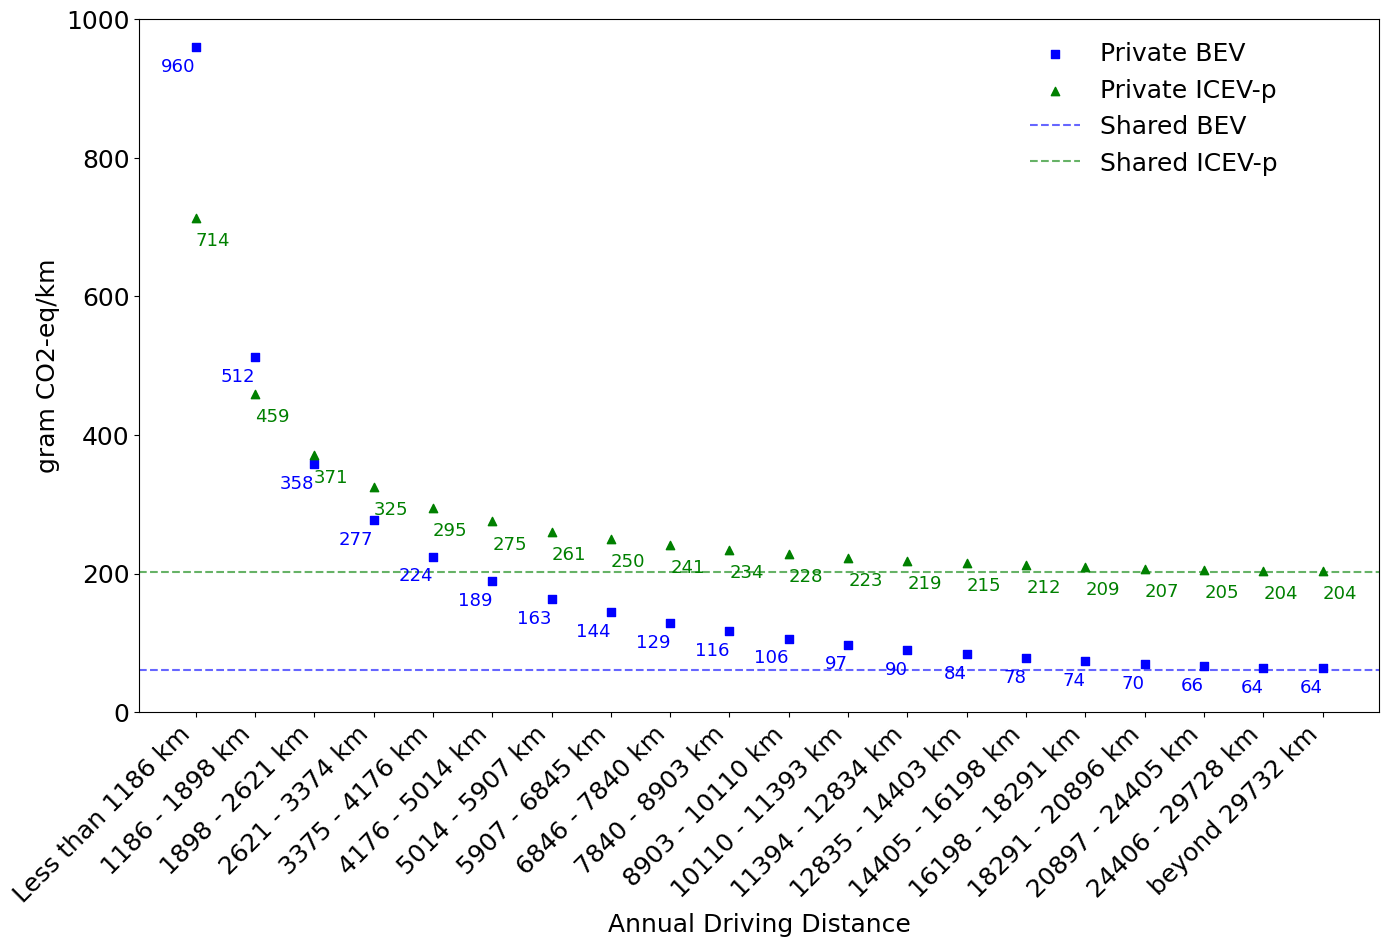

In [154]:
# Define the number of groups to plot
groups_to_plot = 20

# Function to process each DataFrame and calculate min, max, and median values
def process_dataframe(df, label, bins):
    # Make a copy of the DataFrame
    df_copy = df.copy()

    # Perform modifications on the copied DataFrame
    df_copy['indi_cf_pc'] = df_copy['indi_cf_pc'] * 1000
    df_copy['group'] = pd.qcut(df_copy['driving'], q=len(bins)-1, labels=False, duplicates='drop')

    min_values = []
    max_values = []
    median_values = []
    group_labels = []

    for group_index in range(groups_to_plot):
        group_data = df_copy[df_copy['group'] == group_index]['indi_cf_pc']
        driving_data = df_copy[df_copy['group'] == group_index]['driving']

        # Calculate min, max, and median
        min_value = group_data.min()
        max_value = group_data.max()
        median = group_data.median()

        min_values.append(min_value)
        max_values.append(max_value)
        median_values.append(median)

        # Calculate and store the driving range as a label
        min_driving = driving_data.min()
        max_driving = driving_data.max()
        if group_index == groups_to_plot - 1:
            group_labels.append("beyond 29732 km")
        else:
            group_labels.append(f'{min_driving:.0f} - {max_driving:.0f} km')

        # Print the values for verification
        print(f'Group {group_index + 1}: Min = {min_value:.2f}, Max = {max_value:.2f}, Median = {median:.2f}, Driving Range = {min_driving:.0f} km - {max_driving:.0f} km')

    result_df = pd.DataFrame({
        'Group': [f'Group {i+1}' for i in range(groups_to_plot)],
        'Driving Range': group_labels,
        f'{label} Min Value': min_values,
        f'{label} Max Value': max_values,
        f'{label} Median Value': median_values
    })

    return result_df, group_labels, median_values

# Create bins using pd.qcut
_, bins = pd.qcut(user_bev['driving'], q=20, duplicates='drop', retbins=True)

# Process all DataFrames and save the results
print("Processing User BEV:")
processed_user_bev, group_labels0, median_values0 = process_dataframe(user_bev, 'BEV', bins)

print("\nProcessing User ICEV-p:")
processed_user_icevp, group_labels1, median_values1 = process_dataframe(user_icevp, 'ICEV-p', bins)

# Combine the processed DataFrames into one DataFrame
combined_df = pd.concat([processed_user_bev, processed_user_icevp.iloc[:, 2:]], axis=1)

# Save the combined DataFrame for later analysis
combined_df.to_csv('combined_results.csv', index=False)
print("\nCombined DataFrame saved.")

# Plotting function for specific groups with only the median values
def plot_median_groups(median_values0, median_values1, group_labels):
    fig, ax = plt.subplots(figsize=(16, 9))

    positions = range(1, groups_to_plot + 1)

    # Plot for df_run0 (BEV) with squares
    ax.scatter(positions, median_values0, marker='s', color='blue', label='Private BEV')

    # Plot for df_run1 (ICEV-p) with triangles
    ax.scatter(positions, median_values1, marker='^', color='green', label='Private ICEV-p')

    # Add labels next to the points with adjusted positioning
    for i, (med_bev, med_icevp) in enumerate(zip(median_values0, median_values1)):
        ax.text(positions[i], med_bev - 15, f'{med_bev:.0f}', fontsize=13, color='blue', ha='right', va='top')  # BEV label below the point
        ax.text(positions[i], med_icevp - 20, f'{med_icevp:.0f}', fontsize=13, color='green', ha='left', va='top')
    

    # Add lines for shared cars
    tot_shared_BEV = 61
    shared_line_BEV = ax.axhline(y=tot_shared_BEV, color='blue', linestyle='--', label='Shared BEV', alpha=0.6)
    
    tot_shared_ICEVP = 202
    shared_line_ICEVP = ax.axhline(y=tot_shared_ICEVP, color='green', linestyle='--', label='Shared ICEV-p', alpha=0.6)

    ax.set_ylabel(unit, fontsize=18)
    ax.set_xlabel('Annual Driving Distance', fontsize=18)
    ax.grid(False)

    # Set xticks to group labels
    ax.set_xticks(positions)
    ax.set_xticklabels(group_labels, fontsize=18, rotation=45, ha='right')

    ax.tick_params(axis='y', labelsize=18)

    ax.set_ylim(0, 1000)  # Adjust as needed

    # Update the legend to include the shared lines
    plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1), frameon=False, fontsize=18)

    # plt.tight_layout()
    plt.show()

# Modify the first group label to "less than 1186 km"
group_labels0[0] = "Less than 1186 km"

# Plot the specific groups with only the median, using driving ranges as labels
plot_median_groups(
    median_values0,
    median_values1,
    group_labels0  # Use group_labels0, assuming the same driving ranges for all datasets
)


# Adoption analysis for city-wide

In [49]:
# Scale veh_production_pc and veh_eol_pc by driving for bev
bev_data['veh_production_pc'] = bev_data['veh_production_pc'] * bev_data['driving']
bev_data['veh_eol_pc'] = bev_data['veh_eol_pc'] * bev_data['driving']
bev_data['veh_production_cs'] = bev_data['veh_production_cs'] * bev_data['driving']
bev_data['veh_eol_cs'] = bev_data['veh_eol_cs'] * bev_data['driving']

bev_data['veh_operation'] = bev_data['veh_operation']*bev_data['driving']
bev_data['energy_supply'] = bev_data['energy_supply']*bev_data['driving']

bev_data

,person_id,driving,predicted_lifespan,cost_private,cost_shared,cost_gains,rank,powertrain,veh_production,veh_eol,veh_operation,energy_supply,veh_production_pc,veh_eol_pc,veh_production_cs,veh_eol_cs
0,1176412,54828.244139,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,490.166008,125.234397,2694.920692,179.782407,2576.397021,171.875507
1,3428444,54786.834431,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,489.795804,125.139812,2692.885319,179.646625,2574.451166,171.745695
2,34430,54780.191468,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,489.736416,125.124639,2692.558804,179.624842,2574.139011,171.724871
3,2318550,54728.603200,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,489.275215,125.006805,2690.023135,179.455684,2571.714861,171.563152
4,1144105,54664.112003,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,488.698662,124.859499,2686.853260,179.244216,2568.684399,171.360985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79549,1646835,90.950413,2082.638940,9.603201,0.058159,0.006056,5.0,BEV,16159.173995,1078.003969,0.813099,0.207742,705.683317,47.077246,4.273790,0.285111
79550,538113,88.464061,2025.792880,9.872678,0.058159,0.005891,4.0,BEV,16159.173995,1078.003969,0.790871,0.202063,705.652669,47.075202,4.156955,0.277317
79551,968119,86.081584,1971.317104,10.145501,0.058159,0.005733,3.0,BEV,16159.173995,1078.003969,0.769572,0.196621,705.623303,47.073243,4.045002,0.269848
79552,2129179,62.222847,1425.532331,14.029847,0.058159,0.004145,2.0,BEV,16159.173995,1078.003969,0.556274,0.142125,705.329367,47.053634,2.923872,0.195056


In [50]:
# Calculate indi_cf_pc as the sum of specified columns
bev_data['indi_cf_pc'] = (
    bev_data['veh_production_pc'] +
    bev_data['veh_eol_pc'] +
    bev_data['veh_operation'] +
    bev_data['energy_supply']
)

# Calculate indi_cf_cs as the sum of specified columns
bev_data['indi_cf_cs'] = (
    bev_data['veh_production_cs'] +
    bev_data['veh_eol_cs'] +
    bev_data['veh_operation'] +
    bev_data['energy_supply']
)

In [51]:
# Scale veh_production_pc and veh_eol_pc by driving for ICEV-p
icevp_data['veh_production_pc'] = icevp_data['veh_production_pc'] * icevp_data['driving']
icevp_data['veh_eol_pc'] = icevp_data['veh_eol_pc'] * icevp_data['driving']
icevp_data['veh_production_cs'] = icevp_data['veh_production_cs'] * icevp_data['driving']
icevp_data['veh_eol_cs'] = icevp_data['veh_eol_cs'] * icevp_data['driving']

icevp_data['veh_operation'] = icevp_data['veh_operation']*icevp_data['driving']
icevp_data['energy_supply'] = icevp_data['energy_supply']*icevp_data['driving']

icevp_data

,person_id,driving,predicted_lifespan,cost_private,cost_shared,cost_gains,rank,powertrain,veh_production,veh_eol,veh_operation,energy_supply,veh_production_pc,veh_eol_pc,veh_production_cs,veh_eol_cs
0,1176412,54828.244139,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,8091.389269,1450.367898,1513.381754,121.959837,1446.822630,116.595995
1,3428444,54786.834431,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,8085.278148,1449.272490,1512.238753,121.867725,1445.729899,116.507935
2,34430,54780.191468,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,8084.297799,1449.096764,1512.055393,121.852949,1445.554603,116.493808
3,2318550,54728.603200,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,8076.684556,1447.732103,1510.631442,121.738196,1444.193278,116.384102
4,1144105,54664.112003,328758.890625,0.060835,0.058159,0.956020,74991.0,ICEV-p,9074.478205,731.290621,8067.167137,1446.026122,1508.851341,121.594742,1442.491466,116.246957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79549,1646835,90.950413,2082.638940,9.603201,0.058159,0.006056,5.0,ICEV-p,9074.478205,731.290621,13.422192,2.405905,396.289308,31.936013,2.400024,0.193412
79550,538113,88.464061,2025.792880,9.872678,0.058159,0.005891,4.0,ICEV-p,9074.478205,731.290621,13.055263,2.340134,396.272097,31.934626,2.334414,0.188125
79551,968119,86.081584,1971.317104,10.145501,0.058159,0.005733,3.0,ICEV-p,9074.478205,731.290621,12.703664,2.277110,396.255606,31.933297,2.271544,0.183058
79552,2129179,62.222847,1425.532331,14.029847,0.058159,0.004145,2.0,ICEV-p,9074.478205,731.290621,9.182663,1.645977,396.090541,31.919995,1.641953,0.132321


In [52]:
# Calculate indi_cf_pc as the sum of specified columns
icevp_data['indi_cf_pc'] = (
    icevp_data['veh_production_pc'] +
    icevp_data['veh_eol_pc'] +
    icevp_data['veh_operation'] +
    icevp_data['energy_supply']
)

# Calculate indi_cf_cs as the sum of specified columns
icevp_data['indi_cf_cs'] = (
    icevp_data['veh_production_cs'] +
    icevp_data['veh_eol_cs'] +
    icevp_data['veh_operation'] +
    icevp_data['energy_supply']
)

In [53]:
# bev_data.to_csv('bev_data.csv', index=False)
# icevp_data.to_csv('icevp_data.csv', index=False)

display(bev_data)

,person_id,driving,predicted_lifespan,cost_private,cost_shared,cost_gains,rank,powertrain,veh_production,veh_eol,veh_operation,energy_supply,veh_production_pc,veh_eol_pc,veh_production_cs,veh_eol_cs,indi_cf_pc,indi_cf_cs
0,1176412,54828.244139,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,490.166008,125.234397,2694.920692,179.782407,2576.397021,171.875507,3490.103504,3363.672933
1,3428444,54786.834431,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,489.795804,125.139812,2692.885319,179.646625,2574.451166,171.745695,3487.467561,3361.132478
2,34430,54780.191468,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,489.736416,125.124639,2692.558804,179.624842,2574.139011,171.724871,3487.044701,3360.724937
3,2318550,54728.603200,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,489.275215,125.006805,2690.023135,179.455684,2571.714861,171.563152,3483.760839,3357.560034
4,1144105,54664.112003,328758.890625,0.060835,0.058159,0.956020,74991.0,BEV,16159.173995,1078.003969,488.698662,124.859499,2686.853260,179.244216,2568.684399,171.360985,3479.655638,3353.603546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79549,1646835,90.950413,2082.638940,9.603201,0.058159,0.006056,5.0,BEV,16159.173995,1078.003969,0.813099,0.207742,705.683317,47.077246,4.273790,0.285111,753.781404,5.579742
79550,538113,88.464061,2025.792880,9.872678,0.058159,0.005891,4.0,BEV,16159.173995,1078.003969,0.790871,0.202063,705.652669,47.075202,4.156955,0.277317,753.720804,5.427206
79551,968119,86.081584,1971.317104,10.145501,0.058159,0.005733,3.0,BEV,16159.173995,1078.003969,0.769572,0.196621,705.623303,47.073243,4.045002,0.269848,753.662739,5.281043
79552,2129179,62.222847,1425.532331,14.029847,0.058159,0.004145,2.0,BEV,16159.173995,1078.003969,0.556274,0.142125,705.329367,47.053634,2.923872,0.195056,753.081400,3.817326


In [54]:
# Assuming `bev_data` and `icevp_data` are already processed and include necessary columns

# Initialize a function to perform adoption analysis for a given dataset
def perform_adoption_analysis(data, vehicle_type):
    # Initialize a list to store results
    adoption_results = []

    # Total emissions at 0% adoption (baseline)
    cf_at_0_percent = data['indi_cf_pc'].sum()

    # Perform analysis for adoption rates from 0% to 100%
    for adoption_rate in range(0, 101):
        # Number of people adopting carsharing
        num_people_adopting = int(len(data) * adoption_rate / 100)

        # Select top adopters based on rank
        top_adopters = data[data['rank'] <= num_people_adopting]

        # Calculate emissions for adopters using carsharing
        total_emission_shared = top_adopters['indi_cf_cs'].sum()

        # Calculate emissions for remaining people using private transport
        remaining_people = data[~data.index.isin(top_adopters.index)]
        total_emission_private = remaining_people['indi_cf_pc'].sum()

        # Total emissions in this scenario
        total_emissions = total_emission_shared + total_emission_private

        # Calculate reduction potential relative to 0% adoption
        reduction_potential = ((cf_at_0_percent - total_emissions) / cf_at_0_percent) * 100

        # Store results
        adoption_results.append({
            'Vehicle_Type': vehicle_type,
            'Adoption_Rate (%)': adoption_rate,
            'Emission_Shared (Carsharing)': total_emission_shared,
            'Emission_Private (Remaining)': total_emission_private,
            'Total_Emissions': total_emissions,
            'Reduction_Potential (%)': reduction_potential
        })

    # Convert results to a DataFrame
    return pd.DataFrame(adoption_results)

# Perform analysis separately for BEV and ICEV-p
bev_adoption_results = perform_adoption_analysis(bev_data, 'BEV')
icevp_adoption_results = perform_adoption_analysis(icevp_data, 'ICEV-p')

# Save results to separate CSV files
bev_adoption_results.to_csv('bev_adoption_analysis_results.csv', index=False)
icevp_adoption_results.to_csv('icevp_adoption_analysis_results.csv', index=False)

# Print a preview of the results
print("BEV Adoption Results:")
display(bev_adoption_results)
print("\nICEV-p Adoption Results:")
display(icevp_adoption_results)


BEV Adoption Results:


,Vehicle_Type,Adoption_Rate (%),Emission_Shared (Carsharing),Emission_Private (Remaining),Total_Emissions,Reduction_Potential (%)
0,BEV,0,0.000000e+00,8.860299e+07,8.860299e+07,0.000000
1,BEV,1,1.883993e+04,8.799799e+07,8.801683e+07,0.661554
2,BEV,2,4.939493e+04,8.738756e+07,8.743695e+07,1.316028
3,BEV,3,8.847667e+04,8.677444e+07,8.686292e+07,1.963898
4,BEV,4,1.354568e+05,8.615739e+07,8.629285e+07,2.607298
...,...,...,...,...,...,...
96,BEV,96,5.547940e+07,0.000000e+00,5.547940e+07,37.384280
97,BEV,97,5.547940e+07,0.000000e+00,5.547940e+07,37.384280
98,BEV,98,5.547940e+07,0.000000e+00,5.547940e+07,37.384280
99,BEV,99,5.547940e+07,0.000000e+00,5.547940e+07,37.384280



ICEV-p Adoption Results:


,Vehicle_Type,Adoption_Rate (%),Emission_Shared (Carsharing),Emission_Private (Remaining),Total_Emissions,Reduction_Potential (%)
0,ICEV-p,0,0.000000e+00,2.020085e+08,2.020085e+08,0.000000
1,ICEV-p,1,6.220009e+04,2.016129e+08,2.016751e+08,0.165067
2,ICEV-p,2,1.630775e+05,2.011821e+08,2.013452e+08,0.328367
3,ICEV-p,3,2.921060e+05,2.007265e+08,2.010186e+08,0.490019
4,ICEV-p,4,4.472111e+05,2.002471e+08,2.006943e+08,0.650556
...,...,...,...,...,...,...
96,ICEV-p,96,1.831654e+08,0.000000e+00,1.831654e+08,9.327885
97,ICEV-p,97,1.831654e+08,0.000000e+00,1.831654e+08,9.327885
98,ICEV-p,98,1.831654e+08,0.000000e+00,1.831654e+08,9.327885
99,ICEV-p,99,1.831654e+08,0.000000e+00,1.831654e+08,9.327885


# Import required library for plot

In [55]:
import matplotlib.pyplot as plt

In [56]:
# Load the adoption results for BEV and ICEV-p
bev_adoption_results = pd.read_csv('bev_adoption_analysis_results.csv')
icevp_adoption_results = pd.read_csv('icevp_adoption_analysis_results.csv')

In [57]:
bev_adoption_results['Emission_Shared (Carsharing)'] = bev_adoption_results['Emission_Shared (Carsharing)'] / 1000
bev_adoption_results['Emission_Private (Remaining)'] = bev_adoption_results['Emission_Private (Remaining)'] / 1000

icevp_adoption_results['Emission_Shared (Carsharing)'] = icevp_adoption_results['Emission_Shared (Carsharing)'] / 1000
icevp_adoption_results['Emission_Private (Remaining)'] = icevp_adoption_results['Emission_Private (Remaining)'] / 1000

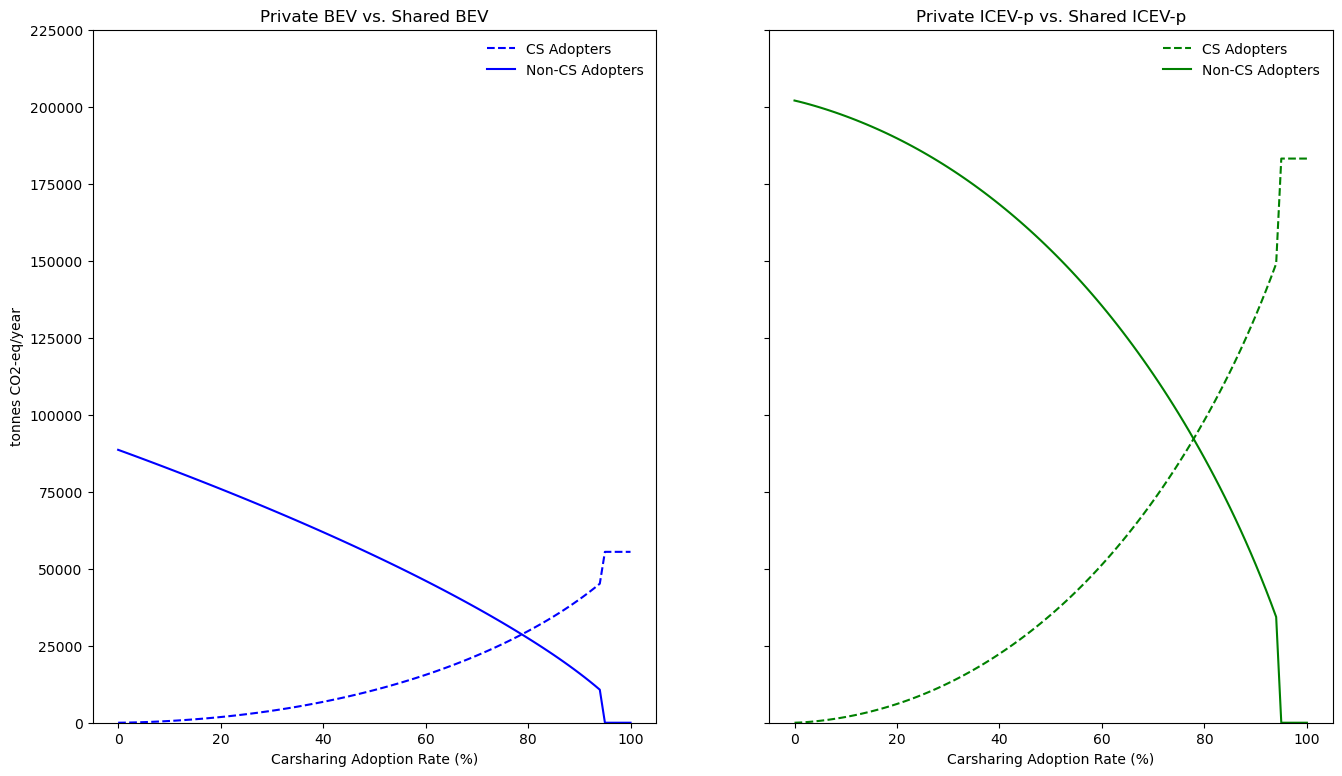

In [102]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)

# Plot for BEV
axes[0].plot(bev_adoption_results['Adoption_Rate (%)'], bev_adoption_results['Emission_Shared (Carsharing)'], label='CS Adopters', linestyle='--', color="blue", marker='')
axes[0].plot(bev_adoption_results['Adoption_Rate (%)'], bev_adoption_results['Emission_Private (Remaining)'], label='Non-CS Adopters', linestyle='-', color="blue", marker='')
axes[0].set_title('Private BEV vs. Shared BEV')
axes[0].set_xlabel('Carsharing Adoption Rate (%)')
axes[0].set_ylabel('tonnes CO2-eq/year')
axes[0].set_ylim(0,225000)
axes[0].legend(frameon=False)

# Plot for ICEV-p
axes[1].plot(icevp_adoption_results['Adoption_Rate (%)'], icevp_adoption_results['Emission_Shared (Carsharing)'], label='CS Adopters', linestyle='--', color="green", marker='')
axes[1].plot(icevp_adoption_results['Adoption_Rate (%)'], icevp_adoption_results['Emission_Private (Remaining)'], label='Non-CS Adopters', linestyle='-', color="green", marker='')
axes[1].set_title('Private ICEV-p vs. Shared ICEV-p')
axes[1].set_xlabel('Carsharing Adoption Rate (%)')
axes[1].legend(frameon=False)


# Adjust layout and show the plot
# plt.tight_layout()
plt.show()

In [12]:
# # Filter the datasets for every 5% step
# bev_adoption_filtered = bev_adoption_results[bev_adoption_results['Adoption_Rate (%)'] % 1 == 0]
# icevp_adoption_filtered = icevp_adoption_results[icevp_adoption_results['Adoption_Rate (%)'] % 1 == 0]

# # Create a figure with two subplots side by side
# fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# # Plot for BEV
# axes[0].plot(bev_adoption_filtered['Adoption_Rate (%)'], bev_adoption_filtered['Emission_Shared (Carsharing)'], label='Emission Shared', linestyle='-', marker='.')
# axes[0].plot(bev_adoption_filtered['Adoption_Rate (%)'], bev_adoption_filtered['Emission_Private (Remaining)'], label='Emission Remaining', linestyle='--', marker='.')
# axes[0].set_title('BEV Adoption Analysis')
# axes[0].set_xlabel('Adoption Rate (%)')
# axes[0].set_ylabel('Emissions')
# axes[0].legend()

# # Plot for ICEV-p
# axes[1].plot(icevp_adoption_filtered['Adoption_Rate (%)'], icevp_adoption_filtered['Emission_Shared (Carsharing)'], label='Emission Shared', linestyle='-', marker='.')
# axes[1].plot(icevp_adoption_filtered['Adoption_Rate (%)'], icevp_adoption_filtered['Emission_Private (Remaining)'], label='Emission Remaining', linestyle='--', marker='.')
# axes[1].set_title('ICEV-p Adoption Analysis')
# axes[1].set_xlabel('Adoption Rate (%)')
# axes[1].legend()

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()


In [86]:
# Define the target adoption rates
target_rates = list(range(10, 101, 10))  # 10%, 20%, ..., 100%

# Ensure the data is sorted by Adoption_Rate (%)
bev_adoption_results = bev_adoption_results.sort_values(by='Adoption_Rate (%)')
icevp_adoption_results = icevp_adoption_results.sort_values(by='Adoption_Rate (%)')

# Extract Reduction_Potential (%) at the target adoption rates
diff_bev = bev_adoption_results.loc[
    bev_adoption_results['Adoption_Rate (%)'].isin(target_rates), 'Reduction_Potential (%)'
].values.tolist()

diff_icevp = icevp_adoption_results.loc[
    icevp_adoption_results['Adoption_Rate (%)'].isin(target_rates), 'Reduction_Potential (%)'
].values.tolist()


# Round diff_bev and diff_icevp to 0 decimal places
diff_bev = [round(val, 1) for val in diff_bev]
diff_icevp = [round(val, 1) for val in diff_icevp]

# Print the results for verification
print("diff_bev:", diff_bev)
print("diff_icevp:", diff_icevp)

diff_bev: [6.4, 12.3, 17.7, 22.5, 26.8, 30.4, 33.4, 35.5, 36.7, 37.4]
diff_icevp: [1.6, 3.1, 4.4, 5.6, 6.7, 7.6, 8.3, 8.9, 9.2, 9.3]


In [59]:
bev_adoption_results['Total_Emissions'] = bev_adoption_results['Total_Emissions'] / 1000
icevp_adoption_results['Total_Emissions'] = icevp_adoption_results['Total_Emissions'] / 1000

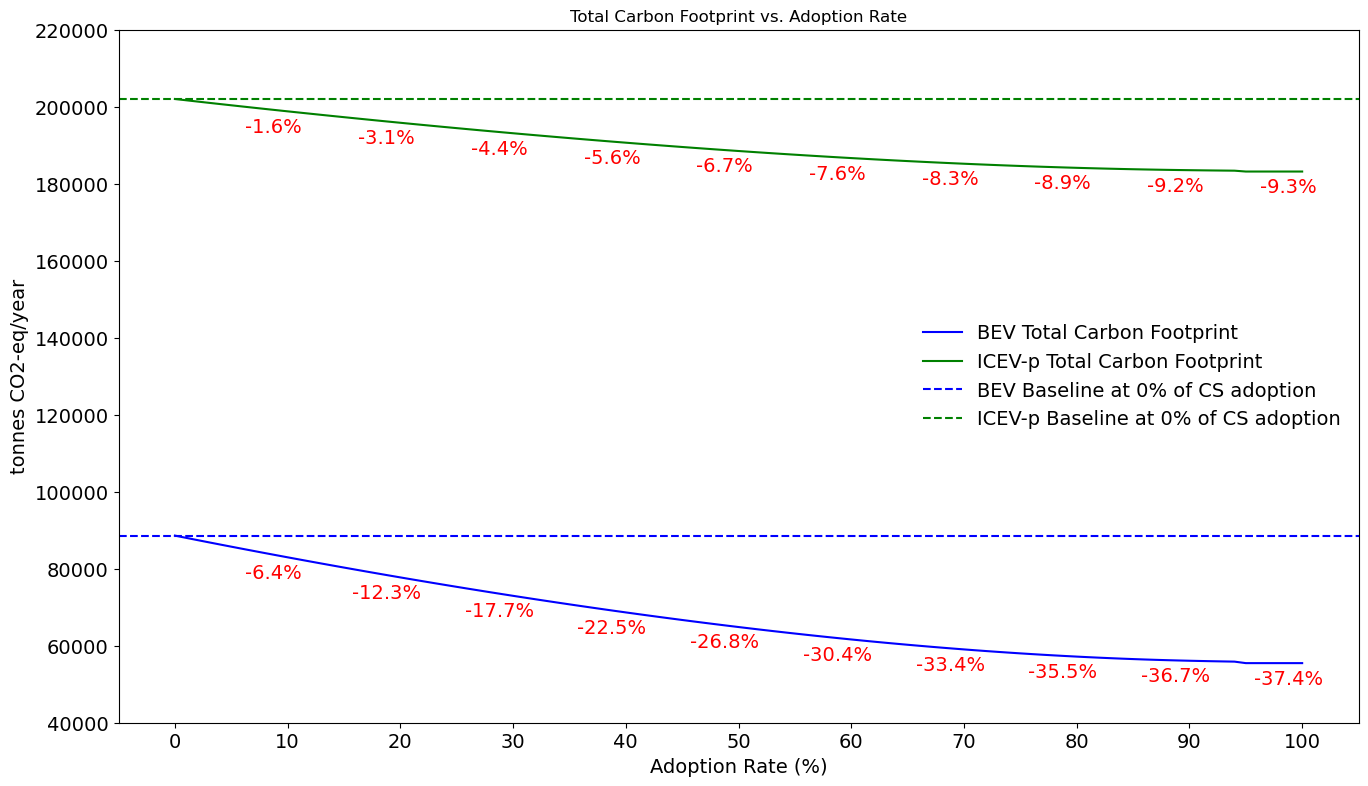

In [105]:
# Ensure data is sorted
bev_adoption_results = bev_adoption_results.sort_values(by='Adoption_Rate (%)')
icevp_adoption_results = icevp_adoption_results.sort_values(by='Adoption_Rate (%)')

# Explicitly retrieve baseline values at 0% adoption
baseline_bev = bev_adoption_results.loc[bev_adoption_results['Adoption_Rate (%)'] == 0, 'Total_Emissions'].values[0]
baseline_icevp = icevp_adoption_results.loc[icevp_adoption_results['Adoption_Rate (%)'] == 0, 'Total_Emissions'].values[0]

# Create the plot
plt.figure(figsize=(16, 9))

# Plot total emissions for BEV
plt.plot(bev_adoption_results['Adoption_Rate (%)'], bev_adoption_results['Total_Emissions'], label='BEV Total Carbon Footprint', linestyle='-', color='blue', marker='')

# Plot total emissions for ICEV-p
plt.plot(icevp_adoption_results['Adoption_Rate (%)'], icevp_adoption_results['Total_Emissions'], label='ICEV-p Total Carbon Footprint', linestyle='-', color='green',marker='')

# Horizontal Baseline Lines
plt.axhline(y=baseline_bev, color='blue', linestyle='--', linewidth=1.5, label='BEV Baseline at 0% of CS adoption')
plt.axhline(y=baseline_icevp, color='green', linestyle='--', linewidth=1.5, label='ICEV-p Baseline at 0% of CS adoption')

# Add labels, title, and legend
plt.xlabel('Adoption Rate (%)', fontsize=14)
plt.ylabel('tonnes CO2-eq/year', fontsize=14)
plt.title('Total Carbon Footprint vs. Adoption Rate')
plt.legend(frameon=False, fontsize=14)

# Define xticks as the target adoption rates for annotations
xticks = [0] + list(range(10, 101, 10))  # 10%, 20%, ..., 100%

# Increase font size for tick labels
plt.xticks(ticks=xticks, fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(40000, 220000)


# Annotate directly on the BEV and ICEV-p results
for i, xtick in enumerate(xticks[1:]):  # Skip 0 for annotations since diff data starts at 10%
    # Find closest index in BEV data
    bev_closest_index = (bev_adoption_results['Adoption_Rate (%)'] - xtick).abs().idxmin()
    plt.annotate(f"-{diff_bev[i]:.1f}%",  # Add negative sign and format to 1 decimal
                 (bev_adoption_results['Adoption_Rate (%)'].iloc[bev_closest_index], 
                  bev_adoption_results['Total_Emissions'].iloc[bev_closest_index]),
                 textcoords="offset points", xytext=(-10, -15), ha='center', color='red', fontsize=14)

    # Find closest index in ICEV-p data
    icevp_closest_index = (icevp_adoption_results['Adoption_Rate (%)'] - xtick).abs().idxmin()
    plt.annotate(f"-{diff_icevp[i]:.1f}%",  # Add negative sign and format to 1 decimal
                 (icevp_adoption_results['Adoption_Rate (%)'].iloc[icevp_closest_index], 
                  icevp_adoption_results['Total_Emissions'].iloc[icevp_closest_index]),
                 textcoords="offset points", xytext=(-10, -15), ha='center', color='red', fontsize=14)



# Show the plot
plt.grid(False)
# plt.tight_layout()
plt.show()